# Análise exploratória de dados

In [1]:
from IPython.display import display, Markdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["#9467bd", "#057476", "#FF7A00"]
# sns.set_style("whitegrid")
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta de dados

In [2]:
df = sns.load_dataset('exercise')
## df.to_csv('../../data/raw/exercise.csv', index=False)
df.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


## 2. Tratamento de dados

In [3]:
df = df.iloc[:,1:6]
df['time'] = df['time'].str.replace('min','')
df['time'] = pd.to_numeric(df['time'])
df

,id,diet,pulse,time,kind
0,1,low fat,85,1,rest
1,1,low fat,85,15,rest
2,1,low fat,88,30,rest
3,2,low fat,90,1,rest
4,2,low fat,92,15,rest
...,...,...,...,...,...
85,29,no fat,135,15,running
86,29,no fat,130,30,running
87,30,no fat,99,1,running
88,30,no fat,111,15,running


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   id      90 non-null     int64   
 1   diet    90 non-null     category
 2   pulse   90 non-null     int64   
 3   time    90 non-null     int64   
 4   kind    90 non-null     category
dtypes: category(2), int64(3)
memory usage: 2.7 KB
None


## 3. Descrição dos dados

- O conjunto de dados **exercise** é um conjunto de dados incorporado na biblioteca Seaborn, comumente usada para visualização de dados em Python. Este conjunto de dados contém informações sobre um experimento que mede a taxa metabólica de voluntários enquanto eles executam diferentes atividades físicas.

    - Colunas presente no conjunto de dados: 
    1. **id**: Um identificador único para cada voluntário.
    2. **diet:** O tipo de dieta que o voluntário segue, podendo ser 'no fat' (sem gordura) ou 'low fat' (baixa gordura).
    3. **pulse:** A taxa metabólica basal do voluntário, medida em batimentos por minuto.
    4. **time:** O tempo em minutos que o voluntário gastou realizando a atividade física.
    5. **kind:** O tipo de atividade física realizada pelo voluntário. Pode ser 'rest' (repouso), 'walking' (caminhada) ou 'running' (corrida).


### 3.1 Dicionário de dados

In [5]:
dicionario = pd.DataFrame([
    {
        "variavel": "id",
        "descricao": "Um identificador único para cada voluntário",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "diet",
        "descricao": "O tipo de dieta que o voluntário segue, podendo ser 'no fat' (sem gordura) ou 'low fat' (baixa gordura)",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    },{
        "variavel": "pulse",
        "descricao": "A taxa metabólica basal do voluntário, medida em batimentos por minuto",
        "tipo":"quantitativa",
        "subtipo":"contínua"
    },{
        "variavel": "time",
        "descricao": "O tempo em minutos que o voluntário gastou realizando a atividade física",
        "tipo":"quantitativa",
        "subtipo":"discreta"
    },{
        "variavel": "kind",
        "descricao": "O tipo de atividade física realizada pelo voluntário. Pode ser 'rest' (repouso), 'walking' (caminhada) ou 'running' (corrida)",
        "tipo":"qualitativa",
        "subtipo":"nominal"
    }
])
dicionario.to_csv('../../data/external/dictionary.csv', index=False)
dicionario

,variavel,descricao,tipo,subtipo
0,id,Um identificador único para cada voluntário,quantitativa,discreta
1,diet,"O tipo de dieta que o voluntário segue, podend...",qualitativa,nominal
2,pulse,"A taxa metabólica basal do voluntário, medida ...",quantitativa,contínua
3,time,O tempo em minutos que o voluntário gastou rea...,quantitativa,discreta
4,kind,O tipo de atividade física realizada pelo volu...,qualitativa,nominal


---
  - São 5 variáveis, com 2 qualitativas nominais, 2 quantitativas discretas, 1 quantitativa contínua
---

## 4. Perguntas de partida e hipóteses
- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma relação entre o tipo de dieta e a taxa metabólica dos voluntários durante diferentes tipos de atividades físicas?
- Há alguma diferença na taxa metabólica dos voluntários durante diferentes tipos de atividades físicas, considerando o tempo gasto?
- A taxa metabólica dos voluntários varia entre os diferentes tipos de dieta, independentemente do tipo de atividade física?
- Existe alguma correlação entre o tempo gasto em atividades físicas e a taxa metabólica dos voluntários?

### Existem dados faltantes, se sim quantos e em quais variáveis?

In [6]:
number_of_na_by_column = df.isnull().sum().loc[lambda x: x > 0]
number_of_na_rows = df.isnull().any(axis=1).sum()

display(number_of_na_by_column)
display(Markdown(
    "---\n"
    f"A partir dessa informação sabemos que as variáveis `{number_of_na_by_column.axes[0].to_list()}`"
    f"contém valores faltantes. Além disso sabemos que temos `{number_of_na_rows}` linhas com valores faltantes."
    "As próximas análises aqui serão realizadas sem considerar os dados faltantes"
    "\n\n ---"
))

df.dropna(inplace=True)

Series([], dtype: int64)

---
A partir dessa informação sabemos que as variáveis `[]`contém valores faltantes. Além disso sabemos que temos `0` linhas com valores faltantes.As próximas análises aqui serão realizadas sem considerar os dados faltantes

 ---

### Qual a distribuição dos dados (variável por variável)?

Iniciaremos com as estatísticas descritivas e posteriormente com visualizações das distribuições.

In [7]:
df.describe(include='all')

,id,diet,pulse,time,kind
count,90.000000,90,90.000000,90.000000,90
unique,NaN,2,NaN,NaN,3
top,NaN,no fat,NaN,NaN,rest
freq,NaN,45,NaN,NaN,30
mean,15.500000,NaN,99.700000,15.333333,NaN
std,8.703932,NaN,14.858471,11.907886,NaN
min,1.000000,NaN,80.000000,1.000000,NaN
25%,8.000000,NaN,90.250000,1.000000,NaN
50%,15.500000,NaN,96.000000,15.000000,NaN
75%,23.000000,NaN,103.000000,30.000000,NaN


---
 - Há 90 observações no conjunto de dados.
 - Diet existem duas categorias (low fat, no fat) e Kind existem três categorias (rest, walking e running)
 - A dieta mais comum é "no fat", com 45 instâncias.
 - A atividade mais comum é "rest", com 30 instâncias.
 - O pulso médio é de aproximadamente 99.7, variando de 80 a 150.
 - O tempo médio é de aproximadamente 15.33, variando de 1 a 30.
---

##### Distribuição das variáveis qualitativas

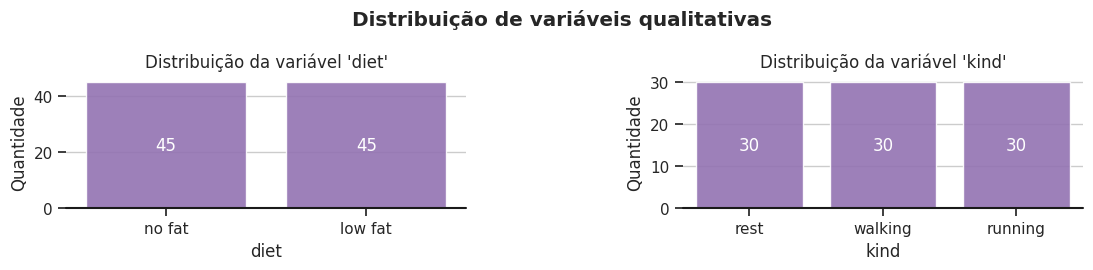

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(12,3))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        label_type='center',
        color='white'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()

---
 - A diet está uniforme nas duas categorias
 - O kind está uniforme nas três categorias
---
##### Distribuição das variáveis quantitativas

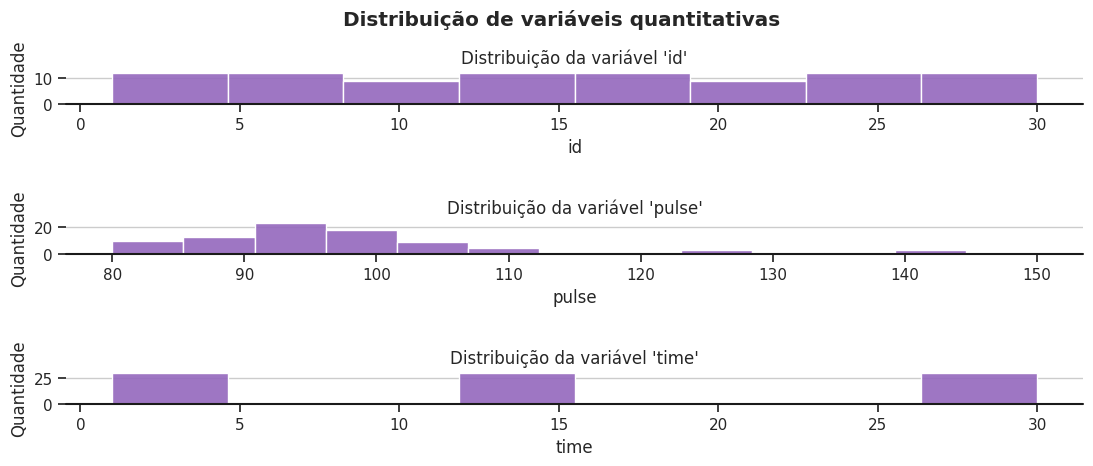

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(12,5))
plt.tight_layout(pad=4, w_pad=10, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
    # Customize grid to show only vertical lines
plt.show()

---
   A partir das visualizações acima podemos dizer que:
 - A distribuição da variável id do voluntário para cada 1 repete 3 vezes, está uniformemente distribuída.
 - A distribuição da pulse tem valores mais frequentes próximos do 91. 
 - A distribuição de time tem três modas, 1, 15 e 30 estão uniformemente distribuída em número de frequência.
---

### Existe alguma relação entre o tipo de dieta e a taxa metabólica dos voluntários durante diferentes tipos de atividades físicas?

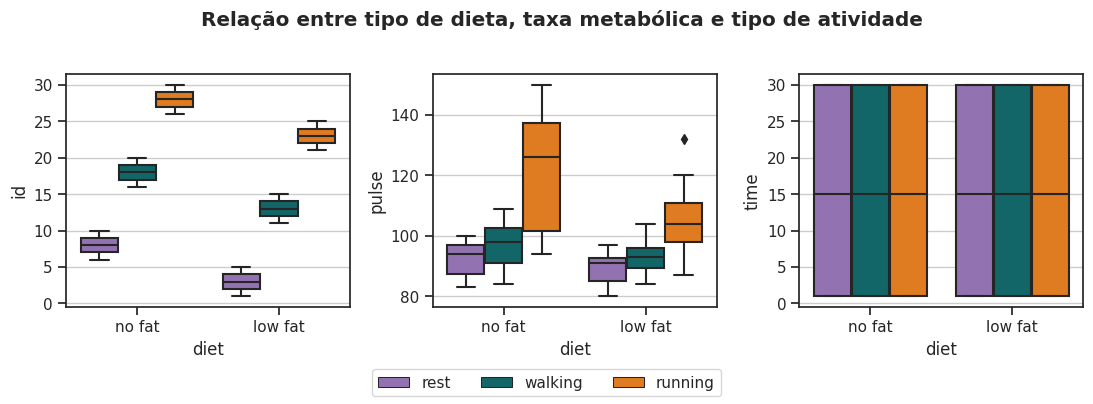

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
plt.tight_layout(pad=4, w_pad=2, h_pad=5)
fig.suptitle('Relação entre tipo de dieta, taxa metabólica e tipo de atividade', fontweight='bold')
for i, variavel in enumerate(dicionario.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.boxplot(
        x="diet", 
        y=variavel, 
        hue="kind", 
        data=df, 
        ax=axes.flatten()[i]
    )
    handles, labels = plt.gca().get_legend_handles_labels()
    ax.grid(axis='y', linestyle='-')
    ax.legend([],[], frameon=False)
# sns.despine(offset=2, trim=True)
fig.legend(handles, labels, loc='lower center', ncol=3)
plt.show()

---
 - 1)Existem mais frequências de ids para categoria 'no fat' nos tipos de atividade (rest, walking e running)
 - 2)No eixo y com pulse na categoria 'no fat' o tipo de atividade corrida demonstra uma mediana e uma máxima maior que as demais categorias
 - 2)Na categoria 'low fat' os tipos de atividade estão com as mediana aparentemente próximas
 - 3)O tempo em minuto está uniformemente distribuído nas categorias 'no fat' e 'low fat' entre 1, 15 30  
---

### Há alguma diferença na taxa metabólica dos voluntários durante diferentes tipos de atividades físicas, considerando o tempo gasto?

<Axes: xlabel='time', ylabel='pulse'>

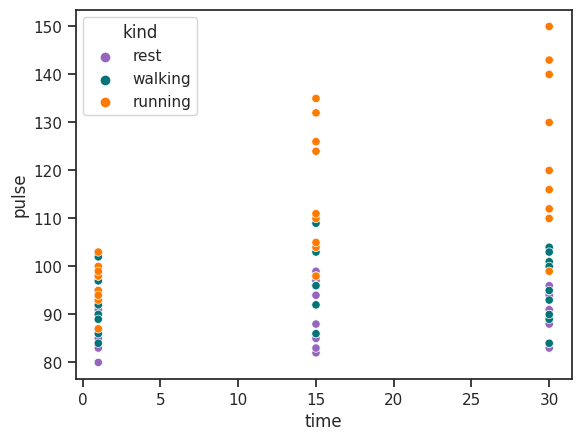

In [11]:
sns.scatterplot(data=df, x="time", y="pulse", hue='kind')

---
 - Quando o tempo está em 1min, a taxa metabólica dos diferentes tipos de atividades ficam pouco disperso, correndo e caminhando são semelhantes
 - Quando o tempo está em 15min, a taxa metabólica para o tipo de atividade 'correndo' aumenta e fica mais disperso
 - Quando o tempo está em 30min, a taxa metabólica para o tipo de atividade 'correndo' fica mais elevado comparado aos outros, acima 110
---

### Taxa metabólica dos voluntários varia entre os diferentes tipos de dieta, independentemente do tipo de atividade física?

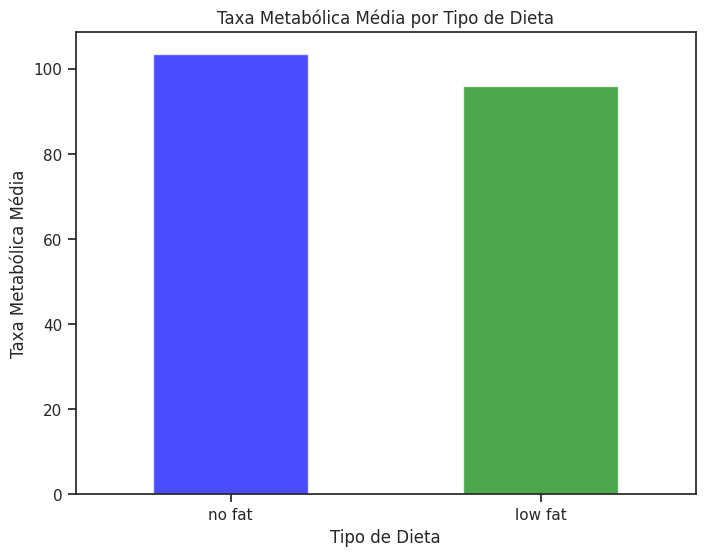

In [12]:
avg_pulse_by_diet = df.groupby('diet')['pulse'].mean()

plt.figure(figsize=(8, 6))
avg_pulse_by_diet.plot(kind='bar', color=['blue', 'green'], alpha=0.7)

plt.title('Taxa Metabólica Média por Tipo de Dieta')
plt.xlabel('Tipo de Dieta')
plt.ylabel('Taxa Metabólica Média')
plt.xticks(rotation=0)
plt.show()

---
 - Para as duas categorias 'no fat' e 'low fat' em média para taxa metabólica há pouca diferença
---

### Existe alguma correlação entre o tempo gasto em atividades físicas e a taxa metabólica dos voluntários?

/tmp/ipykernel_18319/2749633300.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df2.corr()


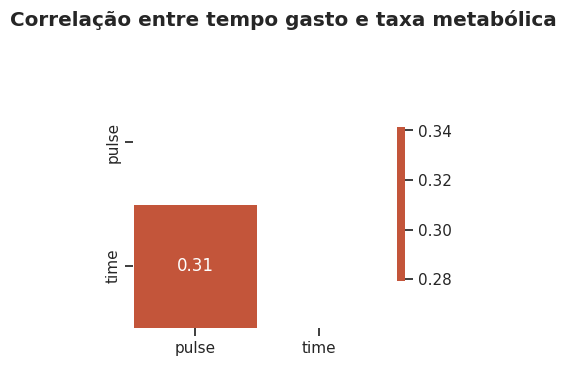

In [13]:
df2 = df.iloc[:,1:5]

corr = df2.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(4,4))
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre tempo gasto e taxa metabólica", fontweight='bold')
plt.show()

---
 - Existe uma correlação fraca positiva entre tempo gasto e taxa metabólica
---

/home/balda/.cache/pypoetry/virtualenvs/src-TkZT-oUX-py3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:88: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


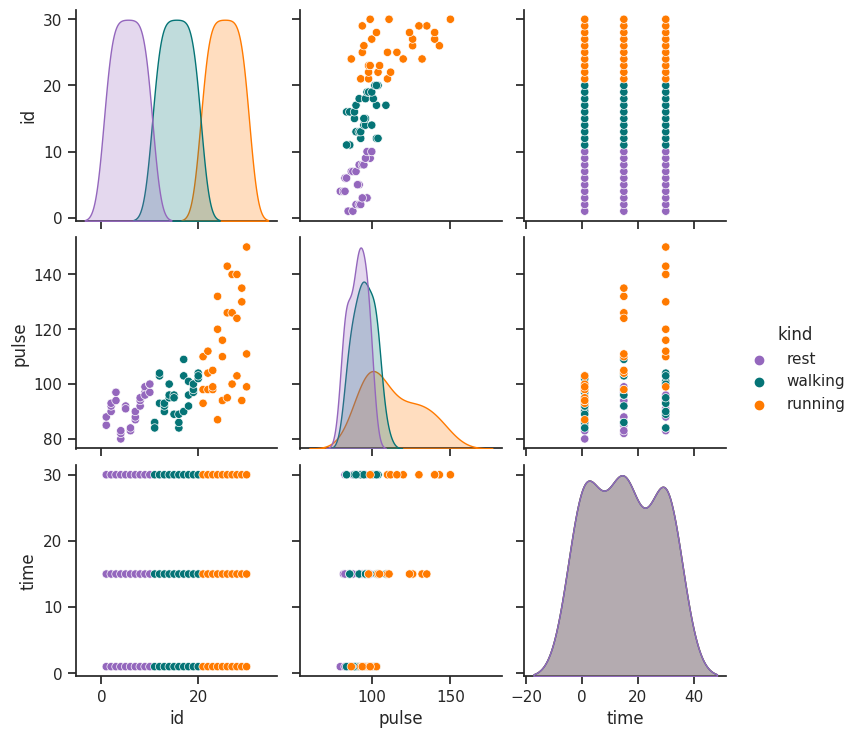

In [14]:
sns.pairplot(df, hue="kind")
plt.show()

## 5. Insights

Com a ajuda das visualizações criadas, bem como da análise em relação ao dicionário de dados, as informações mais relevantes que conseguimos adquirir são:

1. Diferenças nas Dietas e Atividades:
- Parece haver uma tendência de que a categoria 'no fat' seja mais prevalente em todas as atividades (rest, walking e running), indicando possivelmente uma preferência dos participantes por essa dieta.
- Para a categoria 'no fat', a atividade de corrida parece resultar em uma taxa metabólica média e máxima mais elevada em comparação com as outras atividades.
- Na categoria 'low fat', as medianas das taxas metabólicas parecem ser mais semelhantes entre as diferentes atividades.
2. Distribuição do Tempo:
- O tempo gasto em minutos parece estar uniformemente distribuído tanto para a categoria 'no fat' quanto para a 'low fat', com o tempo de 1, 15 e 30 minutos sendo igualmente frequente.
- Entretanto, quando o tempo é de 30 minutos, parece haver um aumento significativo na taxa metabólica para a atividade de corrida, com valores acima de 110.
3. Variação da Taxa Metabólica com o Tempo:
- Para um tempo de 1 minuto, as taxas metabólicas para correr e caminhar são semelhantes, indicando uma resposta metabólica inicial rápida para ambas as atividades.
- Com um tempo de 15 minutos, a taxa metabólica para correr aumenta e se torna mais dispersa, sugerindo um maior esforço metabólico durante essa atividade em comparação com caminhar e descansar.
- Quando o tempo é de 30 minutos, a taxa metabólica para correr é significativamente maior do que para as outras atividades, indicando uma maior demanda metabólica durante corridas mais longas.
Comparação entre Dietas:
- Em média, parece haver pouca diferença na taxa metabólica entre as categorias 'no fat' e 'low fat'.
- A distribuição uniforme das dietas sugere que os participantes foram aleatoriamente atribuídos às diferentes dietas, o que é positivo para a validade dos resultados.
4. Correlação entre Tempo e Taxa Metabólica:
- Existe uma correlação fraca positiva entre o tempo gasto em uma atividade e a taxa metabólica, o que significa que, em geral, quanto mais tempo um voluntário gasta em uma atividade, maior é sua taxa metabólica. No entanto, essa relação não é muito forte.

## 6. Observação
N/A